In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
de  = pd.read_csv(r'G:\CLOUD COUNSELAGE\news.csv')

In [6]:

de.shape

(6335, 4)

In [7]:
de.head(11)

Unnamed: 0                                              title  \
0         8476                       You Can Smell Hillary’s Fear   
1        10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2         3608        Kerry to go to Paris in gesture of sympathy   
3        10142  Bernie supporters on Twitter erupt in anger ag...   
4          875   The Battle of New York: Why This Primary Matters   
5         6903                                        Tehran, USA   
6         7341  Girl Horrified At What She Watches Boyfriend D...   
7           95                  ‘Britain’s Schindler’ Dies at 106   
8         4869  Fact check: Trump and Clinton at the 'commande...   
9         2909  Iran reportedly makes new push for uranium con...   
10        1357  With all three Clintons in Iowa, a glimpse at ...   

                                                 text label  
0   Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1   Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2   U.S. Secretary of State John F. Kerry said Mon...  REAL  
3   — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4   It's primary day in New York and front-runners...  REAL  
5     \nI’m not an immigrant, but my grandparents ...  FAKE  
6   Share This Baylee Luciani (left), Screenshot o...  FAKE  
7   A Czech stockbroker who saved more than 650 Je...  REAL  
8   Hillary Clinton and Donald Trump made some ina...  REAL  
9   Iranian negotiators reportedly have made a las...  REAL  
10  CEDAR RAPIDS, Iowa — “I had one of the most wo...  REAL

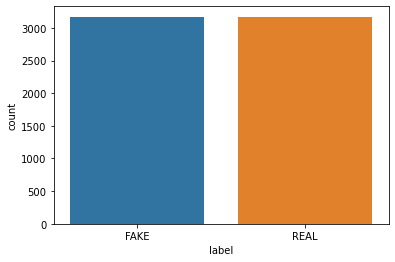

In [8]:
import seaborn as sns
sns.countplot(x='label',data=de)

In [26]:
de.shape

(6335, 4)

In [11]:
labels = de.label

In [27]:
labels.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [15]:
x_train,x_test,y_train,y_test=train_test_split(de['text'], labels, test_size=0.2, random_state=5)

In [16]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.5)

In [19]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

# Passive Aggressive Classifier

In [20]:
pas=PassiveAggressiveClassifier(max_iter=60)
pas.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=60)

In [21]:
y_pred=pas.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.16%


# Confusion matrix

In [24]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[597,  40],
       [ 34, 596]], dtype=int64)